### Import Module

In [34]:
import tensorflow as tf

### Load Data

In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

(28, 28)

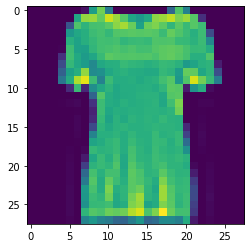

In [38]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(200)

plt.imshow(x_train[10])
x_train[0].shape

### Design Model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

2021-08-22 09:25:39.903746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-22 09:25:39.903891: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-22 09:25:39.903995: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cseru): /proc/driver/nvidia/version does not exist
2021-08-22 09:25:39.904889: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Reshape Data

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

### Compile and Fitting the model

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5)

2021-08-22 09:25:40.656646: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-22 09:25:40.674667: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz


Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.5919 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3267 - accuracy: 0.8801
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2847 - accuracy: 0.8936
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2329 - accuracy: 0.9125


In [19]:
model.get_weights()

[array([[[[-7.02248421e-03, -1.21902175e-01, -1.20926518e-02,
            6.53915331e-02,  3.64345461e-02,  6.68335781e-02,
           -1.57905608e-01, -6.27043797e-03,  7.66676739e-02,
            4.40124944e-02,  2.35033706e-02, -6.21668361e-02,
           -3.02315336e-02, -9.52989534e-02, -8.34784061e-02,
           -3.05326954e-02,  1.48746222e-01,  9.47445482e-02,
            2.55493149e-02, -1.42065352e-02, -1.06481791e-01,
           -1.46336496e-01,  7.75680598e-03, -8.14946741e-02,
           -1.07229501e-01, -2.30730046e-02,  4.49653007e-02,
            3.03699309e-03,  2.21604630e-02, -1.45347148e-01,
           -7.22335055e-02, -1.19331971e-01, -3.59539181e-01,
           -1.14645194e-02, -1.52272061e-01,  2.76508816e-02,
           -1.37014523e-01, -5.41995689e-02, -1.20413126e-02,
           -3.21356431e-02, -5.92501052e-02, -5.42276986e-02,
            1.15799177e-02, -4.52537164e-02, -4.24020030e-02,
            7.67776519e-02, -6.22084597e-04,  4.81507257e-02,
        

In [28]:
model.layers

In [29]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [33]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

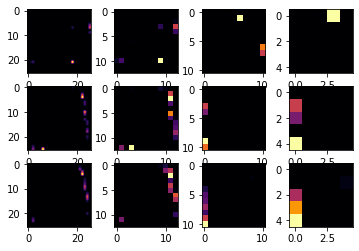

In [32]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)